# EMA EV Test - connect Vensim Model

* and test out some scenario discovery visualisations

In [2]:
# Import necessary libraries
from ema_workbench import (
    RealParameter,
    IntegerParameter,
    TimeSeriesOutcome,
    ema_logging,
    perform_experiments,
)
from ema_workbench.connectors.vensim import VensimModel
from ema_workbench import save_results, load_results
from ema_workbench.analysis import pairs_plotting
from ema_workbench.analysis import prim
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis import plotting

import matplotlib.pyplot as plt

import seaborn as sns

c:\Users\Amber Rozenberg\anaconda3\envs\cura_ev_env\Lib\site-packages\ema_workbench\connectors\__init__.py:29: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
c:\Users\Amber Rozenberg\anaconda3\envs\cura_ev_env\Lib\site-packages\ema_workbench\connectors\__init__.py:34: ImportWarning: simio connector not available
  warnings.warn("simio connector not available", ImportWarning)
c:\Users\Amber Rozenberg\anaconda3\envs\cura_ev_env\Lib\site-packages\ema_workbench\analysis\prim.py:32: ImportWarning: altair based interactive inspection not available
  warnings.warn("altair based interactive inspection not available", ImportWarning)


In [3]:
# Set up and run the experiments
if __name__ == "__main__": 
    # turn on logging
    ema_logging.log_to_stderr(ema_logging.INFO) 

    # instantiate a model
    wd = "./model_files/" # adjust this path to load different version of model
    vensim_model = VensimModel("evmodel", wd=wd, model_file="24_09 Carageing_emissions_utility.vpmx")
    vensim_model.uncertainties = [

        # Car sales
        IntegerParameter("Avg car sales [FossilVehicle]", 3000, 7000),
        IntegerParameter("Avg car sales[ElectricVehicle]", 500, 1500),

        # Initial cars 
        IntegerParameter("initial cars 0 to 5[FossilVehicle]", 8000, 12000),
        IntegerParameter("initial cars 0 to 5[ElectricVehicle]", 1000, 1500)
    ]

    vensim_model.outcomes = [
        TimeSeriesOutcome("Number of EVs"),
        TimeSeriesOutcome("Total CO2 emissions cars[FossilVehicle]"),
        ]

    results = perform_experiments(vensim_model, 50)

[MainProcess/INFO] performing 50 scenarios * 1 policies * 1 model(s) = 50 experiments
100%|██████████████████████████████████████████| 50/50 [00:02<00:00, 21.65it/s]
[MainProcess/INFO] experiments finished


In [4]:
# split results into experiments and outcomes
experiments, outcomes = results

#### Save/load results

In [ ]:
# Save results  
#save_results(results, "./results/ev_results.tar.gz")

c:\Users\Amber Rozenberg\anaconda3\envs\cura_ev_env\Lib\site-packages\ema_workbench\em_framework\outcomes.py:541: UserWarning: still to be tested!!
  warnings.warn("still to be tested!!")
[MainProcess/INFO] results saved successfully to c:\Users\Amber Rozenberg\Documents\0. Julia\Curacao EV\curacao_ev\results\ev_results.tar.gz


In [ ]:
# Load results
#experiments, outcomes = load_results("./results/ev_results.tar.gz")

### Pairplot

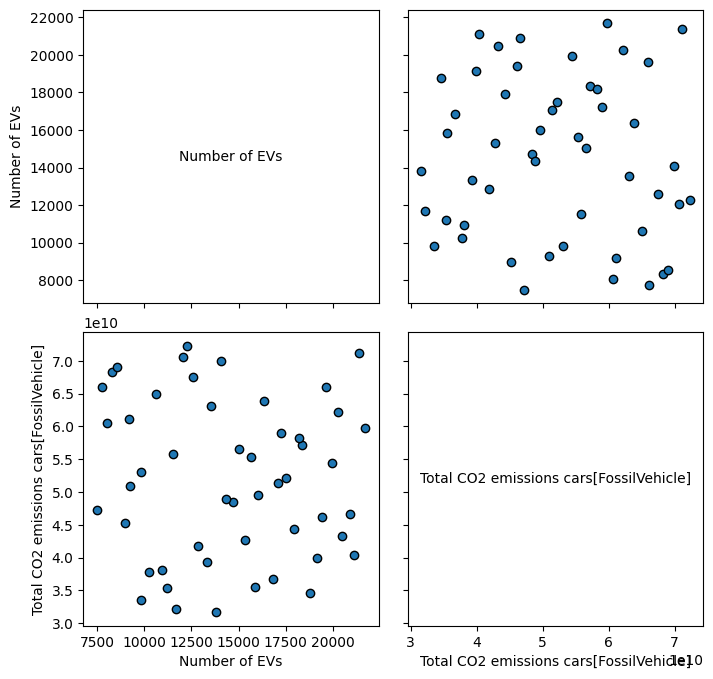

In [5]:
fig, axes = pairs_plotting.pairs_scatter(
    experiments, outcomes, legend=False
)
fig.set_size_inches(8, 8)
plt.show()

### Patient-Rule Induction Method (PRIM)

In [4]:
# use PRIM to find scenarios with less than 10,000 EVs after 30 years
x = experiments
y = outcomes["Number of EVs"].mean(axis=1) < 10000
print(type(y), y.shape, y.dtype)
print(y[:10])

<class 'numpy.ndarray'> (1000,) bool
[False False False False False False False False False False]


In [ ]:
# TO BE FIXED!!!
prim_alg = prim.Prim(x, y, threshold=0.8, mode=prim.RuleInductionType.BINARY)
box1 = prim_alg.find_box()

AttributeError: module 'ema_workbench.analysis.prim' has no attribute 'RuleInductionType'

### Feature Scoring

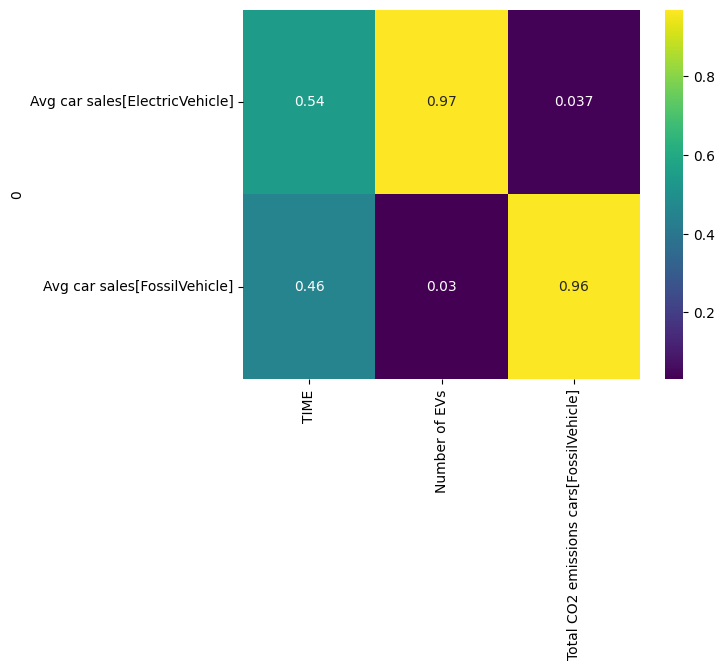

In [19]:
x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

### Plotting Line Graphs

(<Figure size 640x480 with 2 Axes>,
 {'Number of EVs': <Axes: title={'center': 'Number of EVs'}, xlabel='Time', ylabel='Number of EVs'>,
  'Total CO2 emissions cars[FossilVehicle]': <Axes: title={'center': 'Total CO2 emissions cars[FossilVehicle]'}, xlabel='Time', ylabel='Total CO2 emissions cars[FossilVehicle]'>})

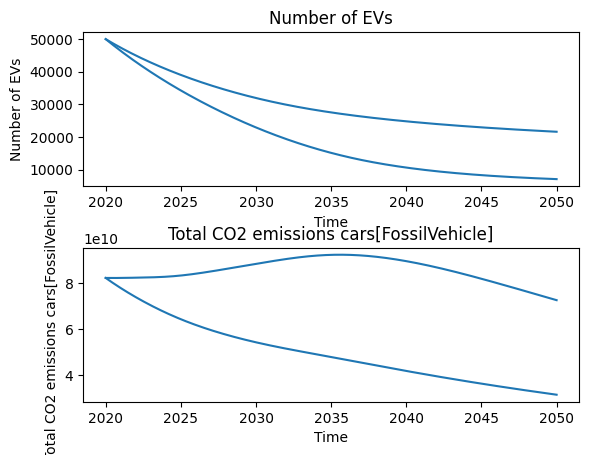

In [ ]:
# envelope plot
plotting.envelopes(experiments, outcomes,
                    outcomes_to_show=None, 
                    group_by=None, grouping_specifiers=None, 
                    density=None, fill=False, legend=True, 
                    titles={}, ylabels={}, log=False)



c:\Users\Amber Rozenberg\anaconda3\envs\cura_ev_env\Lib\site-packages\ema_workbench\analysis\plotting_util.py:369: RuntimeWarning: invalid value encountered in divide
  kde_x = kde_x / np.max(kde_x)


(<Figure size 640x480 with 4 Axes>,
 {'Number of EVs': <Axes: xlabel='time', ylabel='Number of EVs'>,
  'Total CO2 emissions cars[FossilVehicle]': <Axes: xlabel='time', ylabel='Total CO2 emissions cars[FossilVehicle]'>})

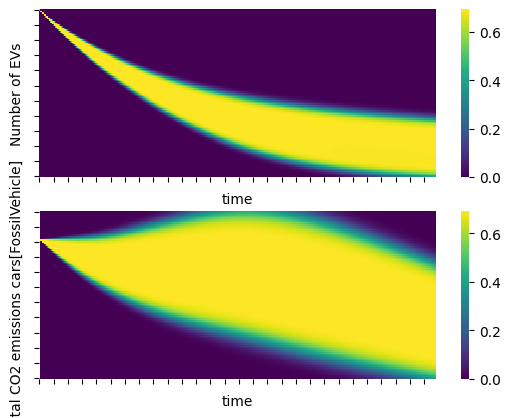

In [ ]:
# KDE over time (30 seconds to run)
plotting.kde_over_time(experiments, outcomes, 
                       outcomes_to_show=None, 
                       group_by=None, grouping_specifiers=None, 
                       colormap='viridis', log=True)

(<Figure size 640x480 with 2 Axes>,
 {'Number of EVs': <Axes: xlabel='Time'>,
  'Total CO2 emissions cars[FossilVehicle]': <Axes: xlabel='Time'>})

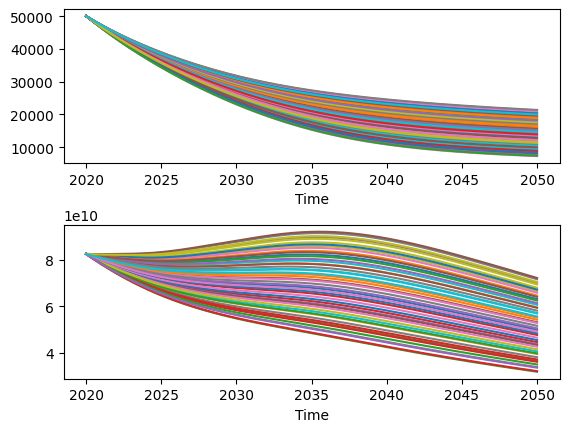

In [5]:
# plotting all lines
plotting.lines(experiments, outcomes, 
               outcomes_to_show=None, group_by=None, 
               grouping_specifiers=None, density='', 
               legend=True, titles=None, ylabels=None, 
               experiments_to_show=None, show_envelope=False, log=False)

([<Figure size 640x480 with 3 Axes>, <Figure size 640x480 with 3 Axes>],
 {'Number of EVs': {'main plot': <Axes: title={'center': 'Number of EVs'}, xlabel='Time', ylabel='Number of EVs'>,
   'density_0': <Axes: >,
   'density_1': <Axes: >},
  'Total CO2 emissions cars[FossilVehicle]': {'main plot': <Axes: title={'center': 'Total CO2 emissions cars[FossilVehicle]'}, xlabel='Time', ylabel='Total CO2 emissions cars[FossilVehicle]'>,
   'density_0': <Axes: >,
   'density_1': <Axes: >}})

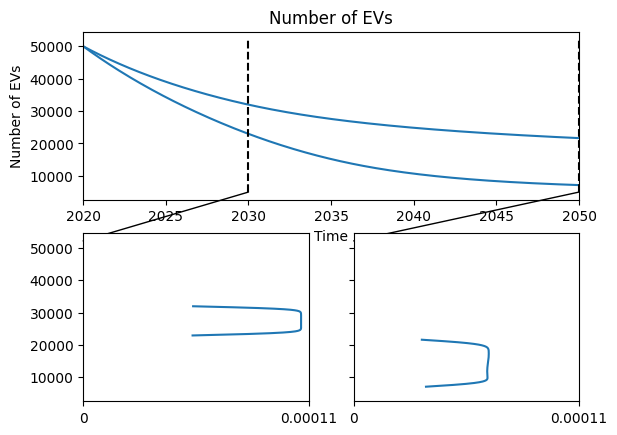

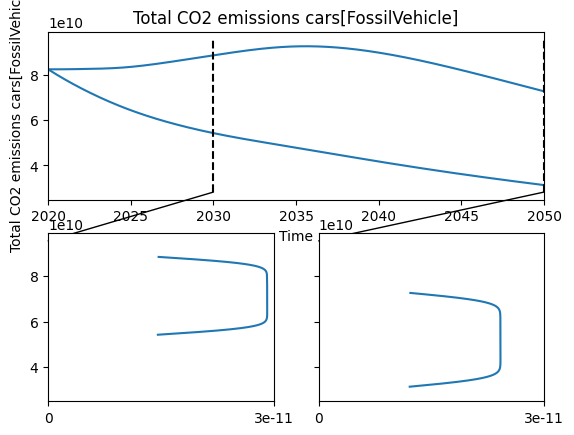

In [18]:
# envelope plot with multiple densities
plotting.multiple_densities(experiments, outcomes, 
                            points_in_time=[2030, 2050], outcomes_to_show=None, 
                            group_by=None, grouping_specifiers=None, 
                            )